In [14]:
import pandas as pd
import geopandas as gp
import geoplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
from shapely.geometry import Point, LineString

In [2]:
network = pd.read_csv('network.csv')
network_link_nodes = network[['attributeOrigType', 'fromLocationX', 'fromLocationY', 'toLocationX', 'toLocationY']]
network_link_nodes.head()

,attributeOrigType,fromLocationX,fromLocationY,toLocationX,toLocationY
0,residential,551370.872255,4.183680e+06,551296.615289,4.183668e+06
1,residential,551296.615289,4.183668e+06,551370.872255,4.183680e+06
2,unclassified,553480.804065,4.180423e+06,553626.820226,4.180434e+06
3,tertiary,548168.667811,4.177638e+06,548160.987001,4.177613e+06
4,service,543445.574811,4.181818e+06,543446.681689,4.181830e+06


In [6]:
geometry = [LineString([Point(xy[1]['fromLocationX'],xy[1]['fromLocationY']),Point(xy[1]['toLocationX'],xy[1]['toLocationY'])]) for xy in network_link_nodes.iterrows()]
geo_links = gp.GeoDataFrame(network_link_nodes, geometry=geometry)

In [9]:
geo_links.head()

,attributeOrigType,fromLocationX,fromLocationY,toLocationX,toLocationY,geometry
0,residential,551370.872255,4.183680e+06,551296.615289,4.183668e+06,"LINESTRING (551370.872 4183680.365, 551296.615..."
1,residential,551296.615289,4.183668e+06,551370.872255,4.183680e+06,"LINESTRING (551296.615 4183668.174, 551370.872..."
2,unclassified,553480.804065,4.180423e+06,553626.820226,4.180434e+06,"LINESTRING (553480.804 4180422.697, 553626.820..."
3,tertiary,548168.667811,4.177638e+06,548160.987001,4.177613e+06,"LINESTRING (548168.668 4177637.847, 548160.987..."
4,service,543445.574811,4.181818e+06,543446.681689,4.181830e+06,"LINESTRING (543445.575 4181817.901, 543446.682..."


In [24]:
geo_links.attributeOrigType.unique().tolist()

['residential',
 'unclassified',
 'tertiary',
 'service',
 'footway',
 'motorway_link',
 'pedestrian',
 'secondary',
 'secondary_link',
 'steps',
 'primary',
 'track',
 'trunk',
 'path',
 'primary_link',
 'motorway',
 'living_street',
 'cycleway',
 'trunk_link',
 'tertiary_link',
 'platform',
 'corridor',
 nan]

In [57]:
residential = geo_links.loc[geo_links['attributeOrigType'] == 'residential']
primary_link = geo_links.loc[geo_links['attributeOrigType'] == 'primary_link']
footway = geo_links.loc[geo_links['attributeOrigType'] == 'footway']
motorway_link = geo_links.loc[geo_links['attributeOrigType'] == 'motorway_link']
cycleway = geo_links.loc[geo_links['attributeOrigType'] == 'cycleway']
platform = geo_links.loc[geo_links['attributeOrigType'] == 'platform']
service = geo_links.loc[geo_links['attributeOrigType'] == 'service']
secondary = geo_links.loc[geo_links['attributeOrigType'] == 'secondary']
secondary_link = geo_links.loc[geo_links['attributeOrigType'] == 'secondary_link']
path = geo_links.loc[geo_links['attributeOrigType'] == 'path']
unclassified = geo_links.loc[geo_links['attributeOrigType'] == 'unclassified']
tertiary = geo_links.loc[geo_links['attributeOrigType'] == 'tertiary']
pedestrian = geo_links.loc[geo_links['attributeOrigType'] == 'pedestrian']
steps = geo_links.loc[geo_links['attributeOrigType'] == 'pedestrian']
track = geo_links.loc[geo_links['attributeOrigType'] == 'track']
trunk = geo_links.loc[geo_links['attributeOrigType'] == 'trunk']
trunk_link = geo_links.loc[geo_links['attributeOrigType'] == 'trunk_link']
living_street = geo_links.loc[geo_links['attributeOrigType'] == 'living_street']
tertiary_link = geo_links.loc[geo_links['attributeOrigType'] == 'tertiary_link']
corridor = geo_links.loc[geo_links['attributeOrigType'] == 'corridor']

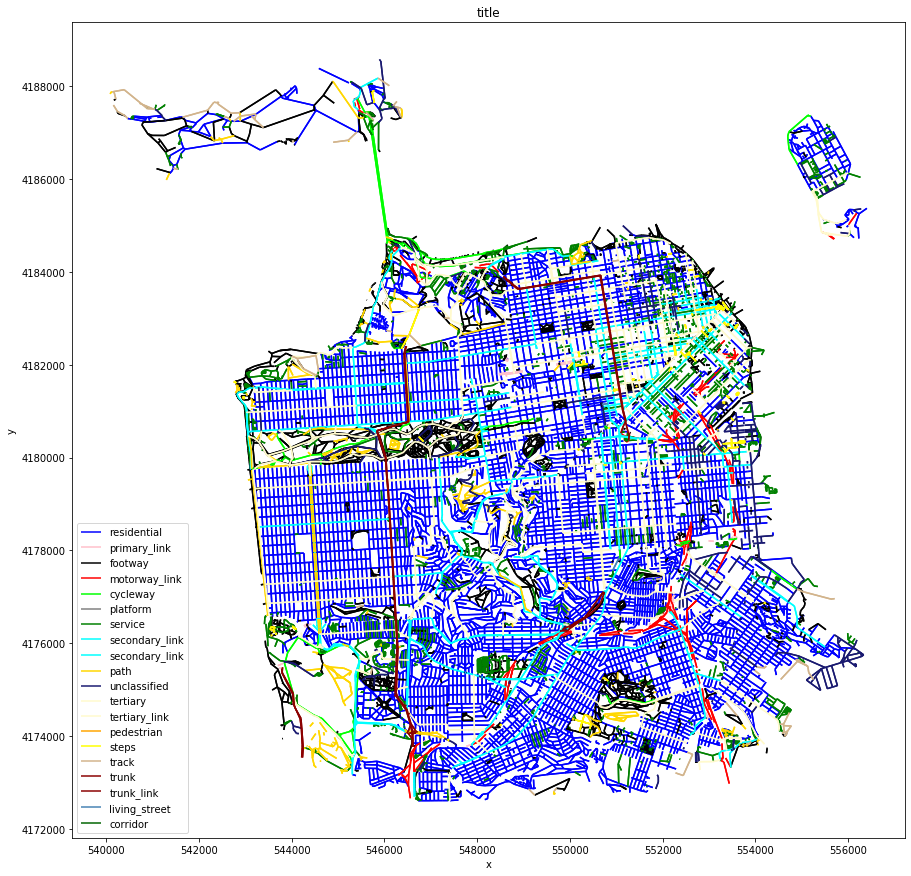

In [61]:
f, ax = plt.subplots(figsize = [15, 15])
residential.plot(ax=ax, color='blue', label="residential")
primary_link.plot(ax=ax, color='pink', label="primary_link")
footway.plot(ax=ax, color='black', label="footway")
motorway_link.plot(ax=ax, color='red', label="motorway_link")
cycleway.plot(ax=ax, color='lime', label="cycleway")
platform.plot(ax=ax, color='grey', label="platform")
service.plot(ax=ax, color='green', label="service")
secondary.plot(ax=ax, color='aqua', label="secondary_link")
secondary_link.plot(ax=ax, color='aqua', label="secondary_link")
path.plot(ax=ax, color='gold', label="path")
unclassified.plot(ax=ax, color='MidnightBlue', label="unclassified")
tertiary.plot(ax=ax, color='LemonChiffon', label="tertiary")
tertiary_link.plot(ax=ax, color='LemonChiffon', label="tertiary_link")
pedestrian.plot(ax=ax, color='Orange', label="pedestrian")
steps.plot(ax=ax, color='Yellow', label="steps")
track.plot(ax=ax, color='Tan', label="track")
trunk.plot(ax=ax, color='DarkRed', label="trunk")
trunk_link.plot(ax=ax, color='DarkRed', label="trunk_link")
living_street.plot(ax=ax, color='SteelBlue', label="living_street")
corridor.plot(ax=ax, color='darkgreen', label="corridor")
ax.legend(loc=3);
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title')
plt.show()